### **Contexto**

**Você e a sua equipe foram escalados pela Agência Nacional de Petróleo e Gás Natural e Biocombustíveis (ANP) para realizar uma análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol.**

**As perguntas a serem respondidas são:**
1. ***Como se comportaram o preço dos combustíveis durante os dois meses citados? Os
valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?***
2. ***Qual o preço médio da gasolina e do etanol nesses dois meses?***
3. ***Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?***
4. ***Qual o preço médio da gasolina e do etanol por estado?***
5. ***Qual o município que possui o menor preço para a gasolina e para o etanol?***
6. ***Qual o município que possui o maior preço para a gasolina e para o etanol?***
7. ***Qual a região que possui o maior valor médio da gasolina?***
8. ***Qual a região que possui o menor valor médio do etanol?***
9. ***Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?***
10. ***Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?***





#####*OBS: As fontes de dados que serão utilizadas no projeto estão disponíveis no portal gov.br. Serão utilizados os arquivos dos dois últimos meses do ano atual (Etanol Hidratado + Gasolina C) contendo a série histórica dos preços da gasolina e do etanol em todo o Brasil.*#####

### Extra 
**Levante mais duas perguntas e respondê-las da forma que achar mais adequada.**

#1- Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?

##1.1 Importação e Tratamento de dados

###Importação

In [ ]:
#Importação das bibliotecas que iremos trabalhar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Importando arquivo csv que será nosso banco de dados 1
dados_1 = pd.read_csv("/content/precos-gasolina-etanol-03.csv", sep=";")

#Importando arquivo csv que será nosso banco de dados 2
dados_2 = pd.read_csv("/content/precos-gasolina-etanol-04.csv", sep=";")
dados_2

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,03/04/2023,"3,37",NaN,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,03/04/2023,"4,77",NaN,R$ / litro,BRANCA
2,NE,AL,ARAPIRACA,AUTO POSTO SAO FRANCISCO LTDA,12.706.529/0001-04,RUA SAO FRANCISCO,274,NaN,CENTRO,57300-080,GASOLINA,03/04/2023,"5,68",NaN,R$ / litro,VIBRA ENERGIA
3,NE,BA,POCOES,R. R COM. VAREJ. E TRANSP. DE DERIV. DE PETRÓL...,06.165.285/0001-05,RUA TIMOTEO GONÇALVES DA COSTA,79,NaN,CENTRO,45260-000,ETANOL,03/04/2023,"4,49",NaN,R$ / litro,IPIRANGA
4,NE,BA,POCOES,R. R COM. VAREJ. E TRANSP. DE DERIV. DE PETRÓL...,06.165.285/0001-05,RUA TIMOTEO GONÇALVES DA COSTA,79,NaN,CENTRO,45260-000,GASOLINA,03/04/2023,"5,88",NaN,R$ / litro,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46415,SE,RJ,DUQUE DE CAXIAS,POSTO ESTRELA GUIA DA TAQUARA LTDA,05.192.699/0002-33,AVENIDA AUTOMOVEL CLUBE,600,A,PARQUE A EQUITATIVA,25260-000,GASOLINA ADITIVADA,28/04/2023,"5,39",NaN,R$ / litro,BRANCA
46416,SE,RJ,DUQUE DE CAXIAS,POSTO ESTRELA GUIA DA TAQUARA LTDA,05.192.699/0002-33,AVENIDA AUTOMOVEL CLUBE,600,A,PARQUE A EQUITATIVA,25260-000,GASOLINA,28/04/2023,"5,39",NaN,R$ / litro,BRANCA
46417,CO,DF,BRASILIA,AUTO POSTO 303 NORTE LTDA,38.194.212/0001-20,QUADRA SHCN SQ 303 BLOCO A,SN PLL,NaN,ASA NORTE,70735-010,ETANOL,28/04/2023,"4,09",NaN,R$ / litro,VIBRA ENERGIA
46418,CO,DF,BRASILIA,AUTO POSTO 303 NORTE LTDA,38.194.212/0001-20,QUADRA SHCN SQ 303 BLOCO A,SN PLL,NaN,ASA NORTE,70735-010,GASOLINA ADITIVADA,28/04/2023,"5,89",NaN,R$ / litro,VIBRA ENERGIA


###Tratamento

In [ ]:
#Realizando a junção dos 2 arquivos CSV e gerando novos indexcom a função IGNORE_INDEX=TRUE
dados = pd.concat([dados_1, dados_2],ignore_index=True)
#REALIZANDO TRATAMENTO DE DADOS
#Usando a função Replace para tirar as , e trocar por . e a função astype para mudar o type para float
dados['Valor de Venda'] = dados['Valor de Venda'].str.replace(',', '.').astype(float)
#Renomeando os nomes das colunas para melhorar a forma de trabalhar.
dados.columns=('Regiao','Estado', 'Municipio', 'Revenda', 'CNPJ da Revenda','Nome da Rua','Numero Rua','Complemento','Bairro','Cep','Produto','Data da Coleta','Preço de Venda','Valor de Compra','Unidade de Medida','Bandeira')
# Formatando a coluna Data da Coleta de str para DATE utilizando a função TO_DATETIME
dados['Data da Coleta'] = pd.to_datetime(dados['Data da Coleta'], format='%d/%m/%Y')
dados

,Regiao,Estado,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Preço de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,LOTEAMENTO PORTAL DA AMAZONIA,S/N,"QUADRA 101 LTS 01,02,03,04, 05 E 33",CALAFATE,69905-801,ETANOL,2023-03-01,4.29,NaN,R$ / litro,VIBRA ENERGIA
1,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,LOTEAMENTO PORTAL DA AMAZONIA,S/N,"QUADRA 101 LTS 01,02,03,04, 05 E 33",CALAFATE,69905-801,GASOLINA ADITIVADA,2023-03-01,5.39,NaN,R$ / litro,VIBRA ENERGIA
2,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,LOTEAMENTO PORTAL DA AMAZONIA,S/N,"QUADRA 101 LTS 01,02,03,04, 05 E 33",CALAFATE,69905-801,GASOLINA,2023-03-01,5.39,NaN,R$ / litro,VIBRA ENERGIA
3,N,AC,RIO BRANCO,COMDEPE COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.198.443/0001-00,ESTRADA JARBAS PASSARINHO,115,NaN,PLACAS,69900-970,GASOLINA ADITIVADA,2023-03-01,5.35,NaN,R$ / litro,VIBRA ENERGIA
4,N,AC,RIO BRANCO,COMDEPE COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.198.443/0001-00,ESTRADA JARBAS PASSARINHO,115,NaN,PLACAS,69900-970,GASOLINA,2023-03-01,5.29,NaN,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95271,SE,RJ,DUQUE DE CAXIAS,POSTO ESTRELA GUIA DA TAQUARA LTDA,05.192.699/0002-33,AVENIDA AUTOMOVEL CLUBE,600,A,PARQUE A EQUITATIVA,25260-000,GASOLINA ADITIVADA,2023-04-28,5.39,NaN,R$ / litro,BRANCA
95272,SE,RJ,DUQUE DE CAXIAS,POSTO ESTRELA GUIA DA TAQUARA LTDA,05.192.699/0002-33,AVENIDA AUTOMOVEL CLUBE,600,A,PARQUE A EQUITATIVA,25260-000,GASOLINA,2023-04-28,5.39,NaN,R$ / litro,BRANCA
95273,CO,DF,BRASILIA,AUTO POSTO 303 NORTE LTDA,38.194.212/0001-20,QUADRA SHCN SQ 303 BLOCO A,SN PLL,NaN,ASA NORTE,70735-010,ETANOL,2023-04-28,4.09,NaN,R$ / litro,VIBRA ENERGIA
95274,CO,DF,BRASILIA,AUTO POSTO 303 NORTE LTDA,38.194.212/0001-20,QUADRA SHCN SQ 303 BLOCO A,SN PLL,NaN,ASA NORTE,70735-010,GASOLINA ADITIVADA,2023-04-28,5.89,NaN,R$ / litro,VIBRA ENERGIA


## 1.2- Como se comportaram o preço dos combustíveis durante os dois meses citados?

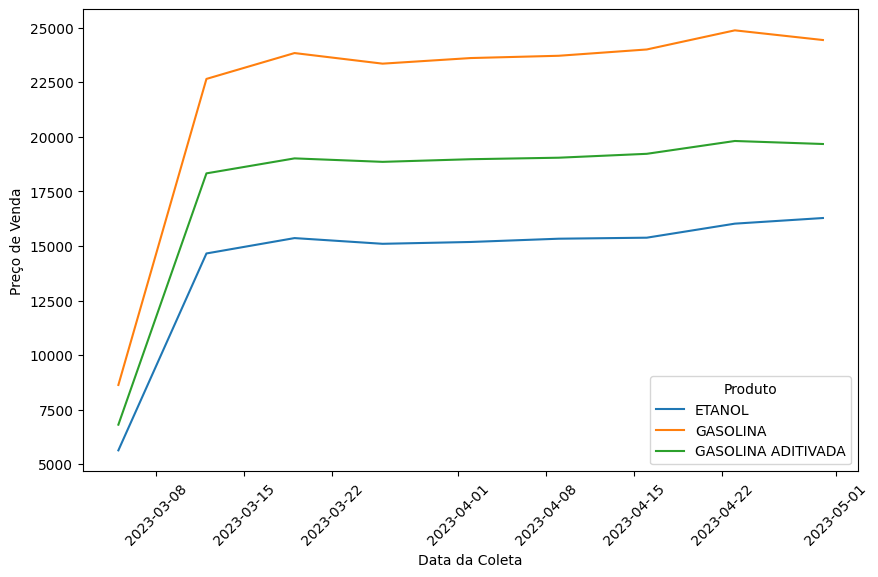

In [ ]:
# Agrupando por semana e tipo de combustível, e calculando a média dos preços de venda
comport = dados.groupby([pd.Grouper(key='Data da Coleta', freq='W'), 'Produto'])['Preço de Venda'].sum().reset_index()
#Plotando o gráfico de linha
fig, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation=45)
sns.lineplot(data=comport, x='Data da Coleta', y='Preço de Venda', hue='Produto', ax=ax)
plt.show()


#2- Qual o preço médio da gasolina e do etanol nesses dois meses?

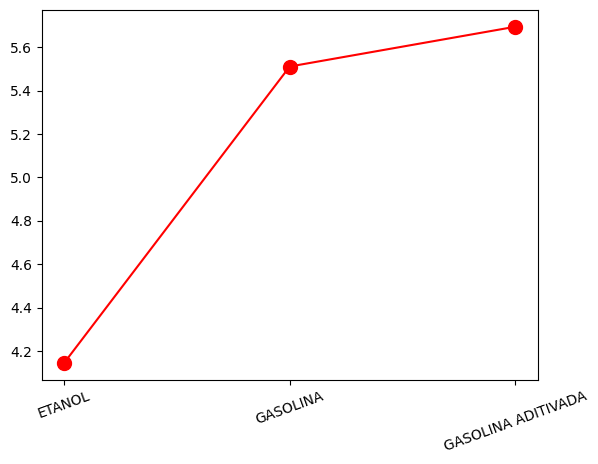

In [ ]:
#Foi feito uma Função para realizar a média com a função mean 

def media(x):
  return x.mean()

media = dados[['Preço de Venda']].groupby(dados['Produto']).agg(media)
media

#a função Groupby foi feita para concatenar os dados do Preço da Venda. 
#Foi utilizado a função Agg para agregar uma função média que é referente ao nome da Função. 

plt.plot(media, marker = 'o', ms = 10, mfc = 'red',color= 'red')#ms tamanho do marcador mec = cor da borda
plt.xticks(rotation=20)
plt.show()

# 3- Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

##3.1 Etanol

In [ ]:
media_estado = dados[['Preço de Venda']].groupby([dados['Produto'], dados['Estado']]).mean()
etanol = media_estado.query('Produto == "ETANOL"').sort_values(by='Preço de Venda', ascending=False)
etanol.head()

# A função head tem a finalidade de chamar os cinco primeiros do resultado. 

Preço de Venda
Produto Estado                
ETANOL  AP            5.224000
        RO            4.913316
        RS            4.910343
        RR            4.905556
        PA            4.781585

<Axes: xlabel='Produto,Estado'>

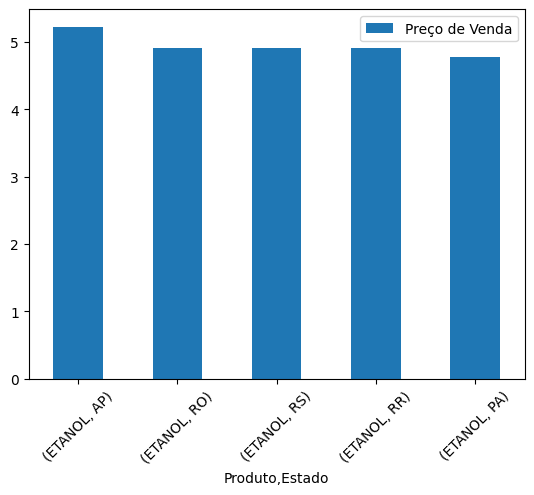

In [ ]:
etanol.head().plot.bar(rot=45)

##3.2 Gasolina

In [ ]:
gasolina = media_estado.query('Produto == "GASOLINA"').sort_values(by='Preço de Venda', ascending=False)
gasolina.head()
# A função head tem a finalidade de chamar os cinco primeiros do resultado.

Preço de Venda
Produto  Estado                
GASOLINA AM            6.489313
         RR            6.086423
         RO            5.993381
         AC            5.926000
         RN            5.872716

<Axes: xlabel='Produto,Estado'>

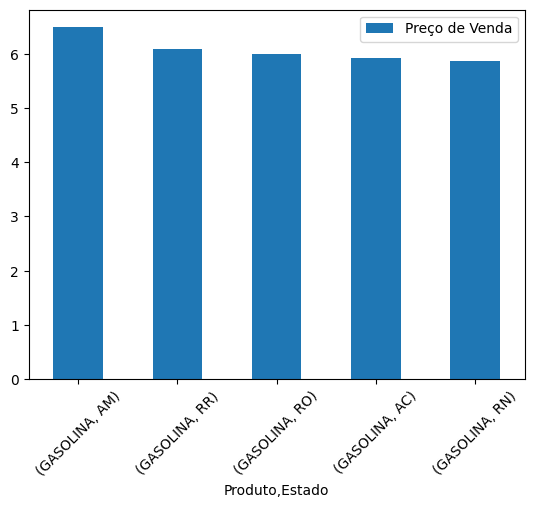

In [ ]:
gasolina.head().plot.bar(rot=45)

##3.3 Gasolina Aditivada

In [ ]:
gasolina_adt = media_estado.query('Produto == "GASOLINA ADITIVADA"').sort_values(by='Preço de Venda', ascending=False)
gasolina_adt.head()
#Para ordenar do maior para o menor foi utilizado o 'sort_values' para organizar e o 'ascending=False' para ser decrescente, se fosse ascending=True seria crescente.

Preço de Venda
Produto            Estado                
GASOLINA ADITIVADA AM            6.517795
                   RR            6.156094
                   RO            6.083455
                   CE            5.990847
                   AC            5.973248

<Axes: xlabel='Produto,Estado'>

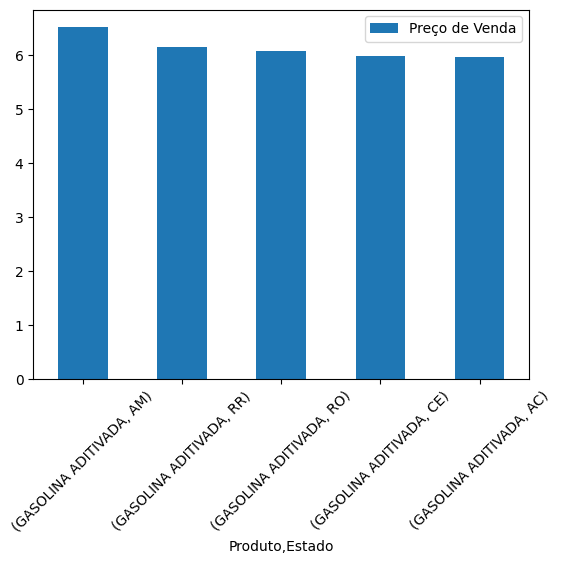

In [ ]:
gasolina_adt.head().plot.bar(rot=45)

#4- Qual o preço médio da gasolina e do etanol por estado?

In [ ]:

media_estado = dados[['Preço de Venda']].groupby([dados['Produto'], dados['Estado']]).mean()

media_estado.sort_values(by='Preço de Venda', ascending=False)



Preço de Venda
Produto            Estado                
GASOLINA ADITIVADA AM            6.517795
GASOLINA           AM            6.489313
GASOLINA ADITIVADA RR            6.156094
GASOLINA           RR            6.086423
GASOLINA ADITIVADA RO            6.083455
...                                   ...
ETANOL             MS            4.006886
                   PB            3.997370
                   MG            3.919321
                   SP            3.839260
                   MT            3.643932

[81 rows x 1 columns]

#5- Qual o município que possui o menor preço para a gasolina e para o etanol?

##5.1 Etanol

In [ ]:
minimo_municipio = dados[['Preço de Venda']].groupby([dados['Produto'], dados['Municipio']]).min()
etanol_min = minimo_municipio.query('Produto == "ETANOL"').sort_values(by='Preço de Venda', ascending=True)

etanol_min.head(1)



,,Preço de Venda
Produto,Municipio,
ETANOL,VARZEA GRANDE,3.13


##5.2 Gasolina

In [ ]:
minimo_municipio = dados[['Preço de Venda']].groupby([dados['Produto'], dados['Municipio']]).min()
gasolina_min = minimo_municipio.query('Produto == "GASOLINA"').sort_values(by='Preço de Venda', ascending=True)

gasolina_min.head(1)

,,Preço de Venda
Produto,Municipio,
GASOLINA,SAO PAULO,4.23


##5.3 Gasolina Aditivada

In [ ]:
minimo_municipio = dados[['Preço de Venda']].groupby([dados['Produto'], dados['Municipio']]).min()

gasolina_adt_min = minimo_municipio.query('Produto == "GASOLINA ADITIVADA"').sort_values(by='Preço de Venda', ascending=True)
#Para ordenar do maior para o menor foi utilizado o 'sort_values' para organizar e o 'ascending=True' para ser crescente, se fosse ascending=False seria decrescente.

gasolina_adt_min.head(1)
#No final para coseguir o maior valor foi utilizado o argumento 'head' que pega o primeiro valor da ordem com a utilização do número 1 entre parenteses.

,,Preço de Venda
Produto,Municipio,
GASOLINA ADITIVADA,ITU,4.52


#6- Qual o município que possui o maior preço para a gasolina e para o etanol?

##6.1 Etanol

In [ ]:
#Foi feito uma variável para conseguir saber o maior valor e para isso foi utilizadp p argumento 'max()'.  

maximo_municipio = dados[['Preço de Venda']].groupby([dados['Produto'], dados['Municipio']]).max()

#Para ordenar do maior para o menor foi utilizado o 'sort_values' para organizar e o 'ascending=False' para ser decrescente, se fosse ascending=True seria crescente.  
etanol_max = maximo_municipio.query('Produto == "ETANOL"').sort_values(by='Preço de Venda', ascending=False)

#No final para coseguir o maior valor foi utilizado o argumento 'head' que pega o primeiro valor da ordem com a utilização do número 1 entre parenteses.
etanol_max.head(1)

,,Preço de Venda
Produto,Municipio,
ETANOL,PAULINIA,6.59


##6.2 Gasolina

In [ ]:
#Foi feito uma variável para conseguir saber o maior valor e para isso foi utilizadp p argumento 'max()'. 
maximo_municipio = dados[['Preço de Venda']].groupby([dados['Produto'], dados['Municipio']]).max()

gasolina_max = maximo_municipio.query('Produto == "GASOLINA"').sort_values(by='Preço de Venda', ascending=False)
#Para ordenar do maior para o menor foi utilizado o 'sort_values' para organizar e o 'ascending=False' para ser decrescente, se fosse ascending=True seria crescente.

gasolina_max.head(1)
#No final para coseguir o maior valor foi utilizado o argumento 'head' que pega o primeiro valor da ordem com a utilização do número 1 entre parenteses.

,,Preço de Venda
Produto,Municipio,
GASOLINA,TEFE,7.35


##6.3 Gasolina Aditivada

In [ ]:
maximo_municipio = dados[['Preço de Venda']].groupby([dados['Produto'], dados['Municipio']]).max()
gasolina_adt_max = maximo_municipio.query('Produto == "GASOLINA ADITIVADA"').sort_values(by='Preço de Venda', ascending=False)
#Para ordenar do maior para o menor foi utilizado o 'sort_values' para organizar e o 'ascending=False' para ser decrescente, se fosse ascending=True seria crescente. 

gasolina_adt_max.head(2)
#No final para coseguir o maior valor foi utilizado o argumento 'head' que pega o os dois primeiros da ordem com a utilização do número 2 entre parenteses.


Preço de Venda
Produto            Municipio                
GASOLINA ADITIVADA ARIQUEMES            8.97
                   MOSSORO              8.97

#7- Qual a região que possui o maior valor médio da gasolina?

##7.1 Gasolina

In [ ]:
maximo_regiao = dados[['Preço de Venda']].groupby([dados['Produto'], dados['Regiao']]).mean()
gasolina_max = maximo_regiao.query('Produto == "GASOLINA"').sort_values(by='Preço de Venda', ascending=False)
#Para ordenar do maior para o menor foi utilizado o 'sort_values' para organizar e o 'ascending=False' para ser decrescente, se fosse ascending=True seria crescente.

gasolina_max.head(1)
#No final para coseguir o maior valor foi utilizado o argumento 'head' que pega o primeiro valor da ordem com a utilização do número 1 entre parenteses.


,,Preço de Venda
Produto,Regiao,
GASOLINA,N,5.859935


##7.2 Gasolina Aditivada

In [ ]:
maximo_regiao = dados[['Preço de Venda']].groupby([dados['Produto'], dados['Regiao']]).mean()
gasolina_adt_max = maximo_regiao.query('Produto == "GASOLINA ADITIVADA"').sort_values(by='Preço de Venda', ascending=False)
#Para ordenar do maior para o menor foi utilizado o 'sort_values' para organizar e o 'ascending=False' para ser decrescente, se fosse ascending=True seria crescente.

gasolina_adt_max.head(1)
#No final para coseguir o maior valor foi utilizado o argumento 'head' que pega o primeiro valor da ordem com a utilização do número 1 entre parenteses.

,,Preço de Venda
Produto,Regiao,
GASOLINA ADITIVADA,N,6.038419


#8- Qual a região que possui o menor valor médio do etanol?

## 8.1 Etanol

In [ ]:
minimo_regiao = dados[['Preço de Venda']].groupby([dados['Produto'], dados['Regiao']]).mean()
etanol_min = minimo_regiao.query('Produto == "ETANOL"').sort_values(by='Preço de Venda', ascending=True)
#Para ordenar do maior para o menor foi utilizado o 'sort_values' para organizar e o 'ascending=True' para ser crescente, se fosse ascending=False seria decrescente

etanol_min.head(1)
#No final para coseguir o maior valor foi utilizado o argumento 'head' que pega o primeiro valor da ordem com a utilização do número 1 entre parenteses.

,,Preço de Venda
Produto,Regiao,
ETANOL,CO,3.966519


#9- Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?

## Etanol por região

In [ ]:
#Primeiro ponto valor da venda converter para float

# gerar séries de cada região

#e depois fazer um DataFrame.

#Nesse novo DataFrame terá somente o valor de venda de cada região

#A correlação será somente entre os valores

norte_et = dados.loc[(dados['Regiao'] == 'N') & (dados['Produto'] == 'ETANOL'), 'Preço de Venda'].astype(float)
nordeste_et = dados.loc[(dados['Regiao'] == 'NE') & (dados['Produto'] == 'ETANOL'), 'Preço de Venda'].astype(float)
sul_et = dados.loc[(dados['Regiao'] == 'S') & (dados['Produto'] == 'ETANOL'), 'Preço de Venda'].astype(float)
suldeste_et = dados.loc[(dados['Regiao'] == 'SE') & (dados['Produto'] == 'ETANOL'), 'Preço de Venda'].astype(float)
co_et = dados.loc[(dados['Regiao'] == 'CO') & (dados['Produto'] == 'ETANOL'), 'Preço de Venda'].astype(float)
etanol_reg = pd.DataFrame({'Norte':norte_et,'Nordeste':nordeste_et,'Sul':sul_et,'Sudeste':suldeste_et,'Centro Oeste':co_et})
etanol_reg.fillna(0).corr()



,Norte,Nordeste,Sul,Sudeste,Centro Oeste
Norte,1.000000,-0.096165,-0.076238,-0.216321,-0.060500
Nordeste,-0.096165,1.000000,-0.188732,-0.535517,-0.149773
Sul,-0.076238,-0.188732,1.000000,-0.424548,-0.118737
Sudeste,-0.216321,-0.535517,-0.424548,1.000000,-0.336912
Centro Oeste,-0.060500,-0.149773,-0.118737,-0.336912,1.000000


## Gasolina por região

In [ ]:
norte_gs = dados.loc[(dados['Regiao'] == 'N') & (dados['Produto'] == 'GASOLINA'), 'Preço de Venda'].astype(float)
nordeste_gs = dados.loc[(dados['Regiao'] == 'NE') & (dados['Produto'] == 'GASOLINA'), 'Preço de Venda'].astype(float)
sul_gs = dados.loc[(dados['Regiao'] == 'S') & (dados['Produto'] == 'GASOLINA'), 'Preço de Venda'].astype(float)
suldeste_gs = dados.loc[(dados['Regiao'] == 'SE') & (dados['Produto'] == 'GASOLINA'), 'Preço de Venda'].astype(float)
co_gs = dados.loc[(dados['Regiao'] == 'CO') & (dados['Produto'] == 'GASOLINA'), 'Preço de Venda'].astype(float)
gasolina_reg = pd.DataFrame({'Norte':norte_gs,'Nordeste':nordeste_gs,'Sul':sul_gs,'Sudeste':suldeste_gs,'Centro Oeste':co_gs})
gasolina_reg.fillna(0).corr()

,Norte,Nordeste,Sul,Sudeste,Centro Oeste
Norte,1.000000,-0.133619,-0.128360,-0.271205,-0.080309
Nordeste,-0.133619,1.000000,-0.220591,-0.466073,-0.138014
Sul,-0.128360,-0.220591,1.000000,-0.447729,-0.132582
Sudeste,-0.271205,-0.466073,-0.447729,1.000000,-0.280125
Centro Oeste,-0.080309,-0.138014,-0.132582,-0.280125,1.000000


## Gasolina Aditivada por região

In [ ]:
norte_gsadt = dados.loc[(dados['Regiao'] == 'N') & (dados['Produto'] == 'GASOLINA ADITIVADA'), 'Preço de Venda'].astype(float)
nordeste_gsadt = dados.loc[(dados['Regiao'] == 'NE') & (dados['Produto'] == 'GASOLINA ADITIVADA'), 'Preço de Venda'].astype(float)
sul_gsadt = dados.loc[(dados['Regiao'] == 'S') & (dados['Produto'] == 'GASOLINA ADITIVADA'), 'Preço de Venda'].astype(float)
suldeste_gsadt = dados.loc[(dados['Regiao'] == 'SE') & (dados['Produto'] == 'GASOLINA ADITIVADA'), 'Preço de Venda'].astype(float)
co_gsadt = dados.loc[(dados['Regiao'] == 'CO') & (dados['Produto'] == 'GASOLINA ADITIVADA'), 'Preço de Venda'].astype(float)
gasolina_adt_reg = pd.DataFrame({'Norte':norte_gsadt,'Nordeste':nordeste_gsadt,'Sul':sul_gsadt,'Sudeste':suldeste_gsadt,'Centro Oeste':co_gsadt})
gasolina_adt_reg.fillna(0).corr()

,Norte,Nordeste,Sul,Sudeste,Centro Oeste
Norte,1.000000,-0.125469,-0.135688,-0.253404,-0.067926
Nordeste,-0.125469,1.000000,-0.242642,-0.453146,-0.121468
Sul,-0.135688,-0.242642,1.000000,-0.490051,-0.131361
Sudeste,-0.253404,-0.453146,-0.490051,1.000000,-0.245322
Centro Oeste,-0.067926,-0.121468,-0.131361,-0.245322,1.000000


#10- Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

##Etanol por bandeira e região

### Região Norte

In [ ]:
import pandas as pd
import numpy as np

band_etanol_preco_N = dados.loc[(dados['Regiao'] == 'N') & (dados['Produto'] == 'ETANOL'), 'Preço de Venda'].values
band_etanol_bandeira_N = dados.loc[(dados['Regiao'] == 'N') & (dados['Produto'] == 'ETANOL'), 'Bandeira'].values
etanol_reg_N = pd.DataFrame({'Venda': band_etanol_preco_N, 'Bandeira': band_etanol_bandeira_N})
etanol_reg_pivot = etanol_reg_N.pivot_table(index=etanol_reg_N.index, columns='Bandeira', values='Venda')
etanol_reg_pivot.fillna(0).corr()


Bandeira,ALESAT,ATEM' S,BRANCA,EQUADOR,IPIRANGA,RAIZEN,SABBÁ,SIMARELLI,VIBRA ENERGIA
Bandeira,,,,,,,,,
ALESAT,1.000000,-0.043704,-0.080972,-0.019575,-0.071951,-0.025543,-0.040705,-0.010991,-0.093740
ATEM' S,-0.043704,1.000000,-0.176403,-0.042646,-0.156750,-0.055648,-0.088680,-0.023945,-0.204220
BRANCA,-0.080972,-0.176403,1.000000,-0.079012,-0.290415,-0.103100,-0.164299,-0.044363,-0.378365
EQUADOR,-0.019575,-0.042646,-0.079012,1.000000,-0.070209,-0.024925,-0.039720,-0.010725,-0.091471
IPIRANGA,-0.071951,-0.156750,-0.290415,-0.070209,1.000000,-0.091613,-0.145995,-0.039420,-0.336211
RAIZEN,-0.025543,-0.055648,-0.103100,-0.024925,-0.091613,1.000000,-0.051829,-0.013995,-0.119358
SABBÁ,-0.040705,-0.088680,-0.164299,-0.039720,-0.145995,-0.051829,1.000000,-0.022302,-0.190208
SIMARELLI,-0.010991,-0.023945,-0.044363,-0.010725,-0.039420,-0.013995,-0.022302,1.000000,-0.051358
VIBRA ENERGIA,-0.093740,-0.204220,-0.378365,-0.091471,-0.336211,-0.119358,-0.190208,-0.051358,1.000000


### Região Nordeste

In [ ]:
band_etanol_preco_NE = dados.loc[(dados['Regiao'] == 'NE') & (dados['Produto'] == 'ETANOL'), 'Preço de Venda'].values
band_etanol_bandeira_NE = dados.loc[(dados['Regiao'] == 'NE') & (dados['Produto'] == 'ETANOL'), 'Bandeira'].values
etanol_reg_NE = pd.DataFrame({'Venda': band_etanol_preco_NE, 'Bandeira': band_etanol_bandeira_NE})
etanol_reg_pivot = etanol_reg_NE.pivot_table(index=etanol_reg_NE.index, columns='Bandeira', values='Venda')
etanol_reg_pivot.fillna(0).corr()

Bandeira,AIR BP,ALESAT,BRANCA,DISLUB,FAN,FEDERAL ENERGIA,IPIRANGA,LARCO,PETROBAHIA,PETROX DISTRIBUIDORA,RAIZEN,SABBÁ,SETTA DISTRIBUIDORA,SP,TDC DISTRIBUIDORA,VIBRA ENERGIA
Bandeira,,,,,,,,,,,,,,,,
AIR BP,1.000000,-0.007064,-0.021084,-0.003024,-0.001708,-0.000832,-0.011202,-0.001440,-0.001744,-0.002360,-0.010911,-0.003629,-0.000744,-0.002794,-0.001748,-0.017788
ALESAT,-0.007064,1.000000,-0.178966,-0.025671,-0.014495,-0.007063,-0.095089,-0.012226,-0.014804,-0.020035,-0.092618,-0.030803,-0.006317,-0.023719,-0.014837,-0.150988
BRANCA,-0.021084,-0.178966,1.000000,-0.076624,-0.043266,-0.021081,-0.283827,-0.036492,-0.044189,-0.059802,-0.276451,-0.091943,-0.018855,-0.070796,-0.044286,-0.450678
DISLUB,-0.003024,-0.025671,-0.076624,1.000000,-0.006206,-0.003024,-0.040712,-0.005234,-0.006338,-0.008578,-0.039654,-0.013188,-0.002705,-0.010155,-0.006352,-0.064645
FAN,-0.001708,-0.014495,-0.043266,-0.006206,1.000000,-0.001707,-0.022988,-0.002956,-0.003579,-0.004844,-0.022391,-0.007447,-0.001527,-0.005734,-0.003587,-0.036502
FEDERAL ENERGIA,-0.000832,-0.007063,-0.021081,-0.003024,-0.001707,1.000000,-0.011201,-0.001440,-0.001744,-0.002360,-0.010910,-0.003628,-0.000744,-0.002794,-0.001748,-0.017785
IPIRANGA,-0.011202,-0.095089,-0.283827,-0.040712,-0.022988,-0.011201,1.000000,-0.019389,-0.023479,-0.031774,-0.146885,-0.048851,-0.010018,-0.037616,-0.023530,-0.239456
LARCO,-0.001440,-0.012226,-0.036492,-0.005234,-0.002956,-0.001440,-0.019389,1.000000,-0.003019,-0.004085,-0.018885,-0.006281,-0.001288,-0.004836,-0.003025,-0.030787
PETROBAHIA,-0.001744,-0.014804,-0.044189,-0.006338,-0.003579,-0.001744,-0.023479,-0.003019,1.000000,-0.004947,-0.022868,-0.007606,-0.001560,-0.005856,-0.003663,-0.037281


### Região Sul

In [ ]:
band_etanol_preco_S = dados.loc[(dados['Regiao'] == 'S') & (dados['Produto'] == 'ETANOL'), 'Preço de Venda'].values
band_etanol_bandeira_S = dados.loc[(dados['Regiao'] == 'S') & (dados['Produto'] == 'ETANOL'), 'Bandeira'].values
etanol_reg_S = pd.DataFrame({'Venda': band_etanol_preco_S, 'Bandeira': band_etanol_bandeira_S})
etanol_reg_pivot = etanol_reg_S.pivot_table(index=etanol_reg_S.index, columns='Bandeira', values='Venda')
etanol_reg_pivot.fillna(0).corr()

Bandeira,ALESAT,AMERICANOIL,BRANCA,CHARRUA,CIAPETRO,DIBRAPE,ESTRADA,IDAZA,IPIRANGA,MAXSUL,...,PELIKANO,POTENCIAL,RAIZEN,RAIZEN MIME,RODOIL,STANG,SUL COMBUSTÍVEIS,UNI,VIBRA ENERGIA,WALENDOWSKY
Bandeira,,,,,,,,,,,,,,,,,,,,,
ALESAT,1.000000,-0.002074,-0.088451,-0.013503,-0.010998,-0.002074,-0.003593,-0.008251,-0.081566,-0.007764,...,-0.006566,-0.012318,-0.053928,-0.021814,-0.013664,-0.020387,-0.003592,-0.005852,-0.055542,-0.002074
AMERICANOIL,-0.002074,1.000000,-0.010425,-0.001592,-0.001296,-0.000244,-0.000423,-0.000973,-0.009614,-0.000915,...,-0.000774,-0.001452,-0.006356,-0.002571,-0.001611,-0.002403,-0.000423,-0.000690,-0.006546,-0.000244
BRANCA,-0.088451,-0.010425,1.000000,-0.067877,-0.055285,-0.010425,-0.018061,-0.041477,-0.410004,-0.039027,...,-0.033003,-0.061916,-0.271074,-0.109653,-0.068686,-0.102476,-0.018057,-0.029414,-0.279191,-0.010425
CHARRUA,-0.013503,-0.001592,-0.067877,1.000000,-0.008440,-0.001592,-0.002757,-0.006332,-0.062594,-0.005958,...,-0.005038,-0.009452,-0.041384,-0.016740,-0.010486,-0.015645,-0.002757,-0.004491,-0.042623,-0.001592
CIAPETRO,-0.010998,-0.001296,-0.055285,-0.008440,1.000000,-0.001296,-0.002246,-0.005157,-0.050982,-0.004853,...,-0.004104,-0.007699,-0.033707,-0.013635,-0.008541,-0.012742,-0.002245,-0.003658,-0.034716,-0.001296
DIBRAPE,-0.002074,-0.000244,-0.010425,-0.001592,-0.001296,1.000000,-0.000423,-0.000973,-0.009614,-0.000915,...,-0.000774,-0.001452,-0.006356,-0.002571,-0.001611,-0.002403,-0.000423,-0.000690,-0.006546,-0.000244
ESTRADA,-0.003593,-0.000423,-0.018061,-0.002757,-0.002246,-0.000423,1.000000,-0.001685,-0.016655,-0.001585,...,-0.001341,-0.002515,-0.011011,-0.004454,-0.002790,-0.004163,-0.000734,-0.001195,-0.011341,-0.000423
IDAZA,-0.008251,-0.000973,-0.041477,-0.006332,-0.005157,-0.000973,-0.001685,1.000000,-0.038248,-0.003641,...,-0.003079,-0.005776,-0.025288,-0.010229,-0.006408,-0.009560,-0.001685,-0.002744,-0.026045,-0.000973
IPIRANGA,-0.081566,-0.009614,-0.410004,-0.062594,-0.050982,-0.009614,-0.016655,-0.038248,1.000000,-0.035989,...,-0.030434,-0.057097,-0.249976,-0.101118,-0.063340,-0.094500,-0.016652,-0.027125,-0.257461,-0.009614


### Região Sudeste

In [ ]:
band_etanol_preco_SE = dados.loc[(dados['Regiao'] == 'SE') & (dados['Produto'] == 'ETANOL'), 'Preço de Venda'].values
band_etanol_bandeira_SE = dados.loc[(dados['Regiao'] == 'SE') & (dados['Produto'] == 'ETANOL'), 'Bandeira'].values
etanol_reg_SE = pd.DataFrame({'Venda': band_etanol_preco_SE, 'Bandeira': band_etanol_bandeira_SE})
etanol_reg_pivot = etanol_reg_SE.pivot_table(index=etanol_reg_SE.index, columns='Bandeira', values='Venda')
etanol_reg_pivot.fillna(0).corr()

Bandeira,ALESAT,ATLÂNTICA,BRANCA,CIAPETRO,D`MAIS,IPIRANGA,PETROBRASIL,RAIZEN,RIO BRANCO,TAURUS,TORRAO,TOTALENERGIES,VIBRA ENERGIA
Bandeira,,,,,,,,,,,,,
ALESAT,1.000000,-0.009411,-0.160505,-0.005182,-0.006555,-0.115601,-0.004632,-0.095611,-0.006130,-0.002839,-0.001639,-0.012471,-0.103891
ATLÂNTICA,-0.009411,1.000000,-0.032837,-0.001060,-0.001341,-0.023650,-0.000948,-0.019561,-0.001254,-0.000581,-0.000335,-0.002551,-0.021255
BRANCA,-0.160505,-0.032837,1.000000,-0.018081,-0.022872,-0.403354,-0.016162,-0.333607,-0.021388,-0.009905,-0.005718,-0.043514,-0.362497
CIAPETRO,-0.005182,-0.001060,-0.018081,1.000000,-0.000738,-0.013022,-0.000522,-0.010770,-0.000691,-0.000320,-0.000185,-0.001405,-0.011703
D`MAIS,-0.006555,-0.001341,-0.022872,-0.000738,1.000000,-0.016473,-0.000660,-0.013625,-0.000874,-0.000405,-0.000234,-0.001777,-0.014804
IPIRANGA,-0.115601,-0.023650,-0.403354,-0.013022,-0.016473,1.000000,-0.011641,-0.240275,-0.015405,-0.007134,-0.004118,-0.031340,-0.261082
PETROBRASIL,-0.004632,-0.000948,-0.016162,-0.000522,-0.000660,-0.011641,1.000000,-0.009628,-0.000617,-0.000286,-0.000165,-0.001256,-0.010461
RAIZEN,-0.095611,-0.019561,-0.333607,-0.010770,-0.013625,-0.240275,-0.009628,1.000000,-0.012741,-0.005900,-0.003406,-0.025921,-0.215936
RIO BRANCO,-0.006130,-0.001254,-0.021388,-0.000691,-0.000874,-0.015405,-0.000617,-0.012741,1.000000,-0.000378,-0.000218,-0.001662,-0.013844


### Região Centro Oeste

In [ ]:
band_etanol_preco_CO = dados.loc[(dados['Regiao'] == 'CO') & (dados['Produto'] == 'ETANOL'), 'Preço de Venda'].values
band_etanol_bandeira_CO = dados.loc[(dados['Regiao'] == 'CO') & (dados['Produto'] == 'ETANOL'), 'Bandeira'].values
etanol_reg_CO = pd.DataFrame({'Venda': band_etanol_preco_CO, 'Bandeira': band_etanol_bandeira_CO})
etanol_reg_pivot = etanol_reg_CO.pivot_table(index=etanol_reg_CO.index, columns='Bandeira', values='Venda')
etanol_reg_pivot.fillna(0).corr()

Bandeira,ALESAT,ATEM' S,BRANCA,CIAPETRO,IPIRANGA,MASUT DISTRIBUIDORA,RAIZEN,RIO BRANCO,ROYAL FIC,SIMARELLI,TAURUS,TOTALENERGIES,VIBRA ENERGIA
Bandeira,,,,,,,,,,,,,
ALESAT,1.000000,-0.003672,-0.111951,-0.006873,-0.076646,-0.013548,-0.048897,-0.008215,-0.005809,-0.005809,-0.023656,-0.002596,-0.057968
ATEM' S,-0.003672,1.000000,-0.022692,-0.001393,-0.015536,-0.002746,-0.009911,-0.001665,-0.001177,-0.001177,-0.004795,-0.000526,-0.011750
BRANCA,-0.111951,-0.022692,1.000000,-0.042476,-0.473658,-0.083725,-0.302176,-0.050768,-0.035898,-0.035899,-0.146189,-0.016043,-0.358233
CIAPETRO,-0.006873,-0.001393,-0.042476,1.000000,-0.029081,-0.005140,-0.018553,-0.003117,-0.002204,-0.002204,-0.008976,-0.000985,-0.021994
IPIRANGA,-0.076646,-0.015536,-0.473658,-0.029081,1.000000,-0.057322,-0.206882,-0.034758,-0.024577,-0.024578,-0.100087,-0.010984,-0.245262
MASUT DISTRIBUIDORA,-0.013548,-0.002746,-0.083725,-0.005140,-0.057322,1.000000,-0.036569,-0.006144,-0.004344,-0.004344,-0.017692,-0.001942,-0.043353
RAIZEN,-0.048897,-0.009911,-0.302176,-0.018553,-0.206882,-0.036569,1.000000,-0.022174,-0.015679,-0.015680,-0.063852,-0.007007,-0.156468
RIO BRANCO,-0.008215,-0.001665,-0.050768,-0.003117,-0.034758,-0.006144,-0.022174,1.000000,-0.002634,-0.002634,-0.010728,-0.001177,-0.026288
ROYAL FIC,-0.005809,-0.001177,-0.035898,-0.002204,-0.024577,-0.004344,-0.015679,-0.002634,1.000000,-0.001863,-0.007585,-0.000832,-0.018588


##Gasolina por bandeira e região

### Região Norte

In [ ]:
band_gasolina_preco_N = dados.loc[(dados['Regiao'] == 'N') & (dados['Produto'] == 'GASOLINA'), 'Preço de Venda'].values
band_gasolina_bandeira_N = dados.loc[(dados['Regiao'] == 'N') & (dados['Produto'] == 'GASOLINA'), 'Bandeira'].values
gasolina_reg_N = pd.DataFrame({'Venda': band_gasolina_preco_N, 'Bandeira': band_gasolina_bandeira_N})
gasolina_reg_pivot = gasolina_reg_N.pivot_table(index=gasolina_reg_N.index, columns='Bandeira', values='Venda')
gasolina_reg_pivot.fillna(0).corr()

Bandeira,ALESAT,ATEM' S,BRANCA,EQUADOR,IPIRANGA,RAIZEN,SABBÁ,VIBRA ENERGIA
Bandeira,,,,,,,,
ALESAT,1.000000,-0.031756,-0.084580,-0.021635,-0.073803,-0.019378,-0.042227,-0.083797
ATEM' S,-0.031756,1.000000,-0.147320,-0.037683,-0.128548,-0.033751,-0.073551,-0.145957
BRANCA,-0.084580,-0.147320,1.000000,-0.100368,-0.342383,-0.089895,-0.195900,-0.388750
EQUADOR,-0.021635,-0.037683,-0.100368,1.000000,-0.087579,-0.022995,-0.050110,-0.099439
IPIRANGA,-0.073803,-0.128548,-0.342383,-0.087579,1.000000,-0.078441,-0.170938,-0.339214
RAIZEN,-0.019378,-0.033751,-0.089895,-0.022995,-0.078441,1.000000,-0.044881,-0.089063
SABBÁ,-0.042227,-0.073551,-0.195900,-0.050110,-0.170938,-0.044881,1.000000,-0.194087
VIBRA ENERGIA,-0.083797,-0.145957,-0.388750,-0.099439,-0.339214,-0.089063,-0.194087,1.000000


### Região Nordeste

In [ ]:
band_gasolina_preco_NE = dados.loc[(dados['Regiao'] == 'NE') & (dados['Produto'] == 'GASOLINA'), 'Preço de Venda'].values
band_gasolina_bandeira_NE = dados.loc[(dados['Regiao'] == 'NE') & (dados['Produto'] == 'GASOLINA'), 'Bandeira'].values
gasolina_reg_NE = pd.DataFrame({'Venda': band_gasolina_preco_NE, 'Bandeira': band_gasolina_bandeira_NE})
gasolina_reg_pivot = gasolina_reg_NE.pivot_table(index=gasolina_reg_NE.index, columns='Bandeira', values='Venda')
gasolina_reg_pivot.fillna(0).corr()

Bandeira,AIR BP,ALESAT,BRANCA,DISLUB,FAN,FEDERAL ENERGIA,IPIRANGA,LARCO,PETROBAHIA,PETROX DISTRIBUIDORA,RAIZEN,SABBÁ,SETTA DISTRIBUIDORA,SP,TDC DISTRIBUIDORA,TEMAPE,VIBRA ENERGIA
Bandeira,,,,,,,,,,,,,,,,,
AIR BP,1.000000,-0.007205,-0.020342,-0.003040,-0.001514,-0.000739,-0.010297,-0.001280,-0.001549,-0.002095,-0.009869,-0.003858,-0.000661,-0.002854,-0.001551,-0.001280,-0.016315
ALESAT,-0.007205,1.000000,-0.198410,-0.029647,-0.014772,-0.007206,-0.100439,-0.012487,-0.015109,-0.020432,-0.096261,-0.037632,-0.006443,-0.027839,-0.015131,-0.012486,-0.159130
BRANCA,-0.020342,-0.198410,1.000000,-0.083704,-0.041705,-0.020345,-0.283572,-0.035254,-0.042656,-0.057686,-0.271776,-0.106247,-0.018192,-0.078597,-0.042720,-0.035252,-0.449275
DISLUB,-0.003040,-0.029647,-0.083704,1.000000,-0.006232,-0.003040,-0.042372,-0.005268,-0.006374,-0.008620,-0.040610,-0.015876,-0.002718,-0.011744,-0.006383,-0.005268,-0.067132
FAN,-0.001514,-0.014772,-0.041705,-0.006232,1.000000,-0.001515,-0.021112,-0.002625,-0.003176,-0.004295,-0.020234,-0.007910,-0.001354,-0.005852,-0.003181,-0.002625,-0.033448
FEDERAL ENERGIA,-0.000739,-0.007206,-0.020345,-0.003040,-0.001515,1.000000,-0.010299,-0.001280,-0.001549,-0.002095,-0.009870,-0.003859,-0.000661,-0.002855,-0.001552,-0.001280,-0.016317
IPIRANGA,-0.010297,-0.100439,-0.283572,-0.042372,-0.021112,-0.010299,1.000000,-0.017846,-0.021593,-0.029202,-0.137578,-0.053784,-0.009209,-0.039787,-0.021626,-0.017845,-0.227432
LARCO,-0.001280,-0.012487,-0.035254,-0.005268,-0.002625,-0.001280,-0.017846,1.000000,-0.002685,-0.003630,-0.017104,-0.006687,-0.001145,-0.004946,-0.002689,-0.002219,-0.028275
PETROBAHIA,-0.001549,-0.015109,-0.042656,-0.006374,-0.003176,-0.001549,-0.021593,-0.002685,1.000000,-0.004393,-0.020695,-0.008090,-0.001385,-0.005985,-0.003253,-0.002684,-0.034211


### Região Sul

In [ ]:
band_gasolina_preco_S = dados.loc[(dados['Regiao'] == 'S') & (dados['Produto'] == 'GASOLINA'), 'Preço de Venda'].values
band_gasolina_bandeira_S = dados.loc[(dados['Regiao'] == 'S') & (dados['Produto'] == 'GASOLINA'), 'Bandeira'].values
gasolina_reg_S = pd.DataFrame({'Venda': band_gasolina_preco_S, 'Bandeira': band_gasolina_bandeira_S})
gasolina_reg_pivot = gasolina_reg_S.pivot_table(index=gasolina_reg_S.index, columns='Bandeira', values='Venda')
gasolina_reg_pivot.fillna(0).corr()

Bandeira,ALESAT,AMERICANOIL,BRANCA,CHARRUA,CIAPETRO,DIBRAPE,ESTRADA,IDAZA,IPIRANGA,MAXSUL,...,POTENCIAL,RAIZEN,RAIZEN MIME,REJAILE,RODOIL,STANG,SUL COMBUSTÍVEIS,UNI,VIBRA ENERGIA,WALENDOWSKY
Bandeira,,,,,,,,,,,,,,,,,,,,,
ALESAT,1.000000,-0.004255,-0.093020,-0.016561,-0.010085,-0.004660,-0.003295,-0.007615,-0.099594,-0.012062,...,-0.014031,-0.057727,-0.025276,-0.005709,-0.020107,-0.018668,-0.005035,-0.005384,-0.068786,-0.002691
AMERICANOIL,-0.004255,1.000000,-0.017275,-0.003076,-0.001873,-0.000865,-0.000612,-0.001414,-0.018496,-0.002240,...,-0.002606,-0.010721,-0.004694,-0.001060,-0.003734,-0.003467,-0.000935,-0.001000,-0.012774,-0.000500
BRANCA,-0.093020,-0.017275,1.000000,-0.067237,-0.040946,-0.018919,-0.013378,-0.030917,-0.404341,-0.048972,...,-0.056963,-0.234366,-0.102617,-0.023179,-0.081631,-0.075791,-0.020440,-0.021856,-0.279262,-0.010923
CHARRUA,-0.016561,-0.003076,-0.067237,1.000000,-0.007290,-0.003368,-0.002382,-0.005504,-0.071989,-0.008719,...,-0.010142,-0.041727,-0.018270,-0.004127,-0.014534,-0.013494,-0.003639,-0.003891,-0.049720,-0.001945
CIAPETRO,-0.010085,-0.001873,-0.040946,-0.007290,1.000000,-0.002051,-0.001450,-0.003352,-0.043840,-0.005310,...,-0.006176,-0.025411,-0.011126,-0.002513,-0.008851,-0.008217,-0.002216,-0.002370,-0.030278,-0.001184
DIBRAPE,-0.004660,-0.000865,-0.018919,-0.003368,-0.002051,1.000000,-0.000670,-0.001549,-0.020256,-0.002453,...,-0.002854,-0.011741,-0.005141,-0.001161,-0.004090,-0.003797,-0.001024,-0.001095,-0.013990,-0.000547
ESTRADA,-0.003295,-0.000612,-0.013378,-0.002382,-0.001450,-0.000670,1.000000,-0.001095,-0.014323,-0.001735,...,-0.002018,-0.008302,-0.003635,-0.000821,-0.002892,-0.002685,-0.000724,-0.000774,-0.009892,-0.000387
IDAZA,-0.007615,-0.001414,-0.030917,-0.005504,-0.003352,-0.001549,-0.001095,1.000000,-0.033102,-0.004009,...,-0.004663,-0.019187,-0.008401,-0.001898,-0.006683,-0.006205,-0.001673,-0.001789,-0.022862,-0.000894
IPIRANGA,-0.099594,-0.018496,-0.404341,-0.071989,-0.043840,-0.020256,-0.014323,-0.033102,1.000000,-0.052433,...,-0.060989,-0.250930,-0.109870,-0.024817,-0.087401,-0.081148,-0.021885,-0.023401,-0.298999,-0.011695


### Região Sudeste

In [ ]:
band_gasolina_preco_SE = dados.loc[(dados['Regiao'] == 'SE') & (dados['Produto'] == 'GASOLINA'), 'Preço de Venda'].values
band_gasolina_bandeira_SE = dados.loc[(dados['Regiao'] == 'SE') & (dados['Produto'] == 'GASOLINA'), 'Bandeira'].values
gasolina_reg_SE = pd.DataFrame({'Venda': band_gasolina_preco_SE, 'Bandeira': band_gasolina_bandeira_SE})
gasolina_reg_pivot = gasolina_reg_SE.pivot_table(index=gasolina_reg_SE.index, columns='Bandeira', values='Venda')
gasolina_reg_pivot.fillna(0).corr()

Bandeira,ALESAT,ATLÂNTICA,BRANCA,CIAPETRO,D`MAIS,IPIRANGA,PETROBRASIL,RAIZEN,RIO BRANCO,TAURUS,TORRAO,TOTALENERGIES,VIBRA ENERGIA
Bandeira,,,,,,,,,,,,,
ALESAT,1.000000,-0.013283,-0.158962,-0.005129,-0.006490,-0.115099,-0.005376,-0.096251,-0.006070,-0.002809,-0.001622,-0.012365,-0.107933
ATLÂNTICA,-0.013283,1.000000,-0.045526,-0.001469,-0.001859,-0.032964,-0.001540,-0.027566,-0.001739,-0.000805,-0.000465,-0.003541,-0.030912
BRANCA,-0.158962,-0.045526,1.000000,-0.017581,-0.022243,-0.394496,-0.018425,-0.329897,-0.020806,-0.009629,-0.005559,-0.042381,-0.369935
CIAPETRO,-0.005129,-0.001469,-0.017581,1.000000,-0.000718,-0.012730,-0.000595,-0.010645,-0.000671,-0.000311,-0.000179,-0.001368,-0.011937
D`MAIS,-0.006490,-0.001859,-0.022243,-0.000718,1.000000,-0.016105,-0.000752,-0.013468,-0.000849,-0.000393,-0.000227,-0.001730,-0.015102
IPIRANGA,-0.115099,-0.032964,-0.394496,-0.012730,-0.016105,1.000000,-0.013341,-0.238867,-0.015065,-0.006972,-0.004025,-0.030687,-0.267857
PETROBRASIL,-0.005376,-0.001540,-0.018425,-0.000595,-0.000752,-0.013341,1.000000,-0.011157,-0.000704,-0.000326,-0.000188,-0.001433,-0.012511
RAIZEN,-0.096251,-0.027566,-0.329897,-0.010645,-0.013468,-0.238867,-0.011157,1.000000,-0.012598,-0.005830,-0.003366,-0.025662,-0.223995
RIO BRANCO,-0.006070,-0.001739,-0.020806,-0.000671,-0.000849,-0.015065,-0.000704,-0.012598,1.000000,-0.000368,-0.000212,-0.001618,-0.014127


### Região Centro Oeste

In [ ]:
band_gasolina_preco_CO = dados.loc[(dados['Regiao'] == 'CO') & (dados['Produto'] == 'GASOLINA'), 'Preço de Venda'].values
band_gasolina_bandeira_CO = dados.loc[(dados['Regiao'] == 'CO') & (dados['Produto'] == 'GASOLINA'), 'Bandeira'].values
gasolina_reg_CO = pd.DataFrame({'Venda': band_gasolina_preco_CO, 'Bandeira': band_gasolina_bandeira_CO})
gasolina_reg_pivot = gasolina_reg_CO.pivot_table(index=gasolina_reg_CO.index, columns='Bandeira', values='Venda')
gasolina_reg_pivot.fillna(0).corr()

Bandeira,ALESAT,ATEM' S,BRANCA,CIAPETRO,IPIRANGA,MASUT DISTRIBUIDORA,RAIZEN,RIO BRANCO,ROYAL FIC,SIMARELLI,TAURUS,TOTALENERGIES,VIBRA ENERGIA
Bandeira,,,,,,,,,,,,,
ALESAT,1.000000,-0.003595,-0.107790,-0.006731,-0.074434,-0.013265,-0.047850,-0.008045,-0.005687,-0.005685,-0.023439,-0.002542,-0.064144
ATEM' S,-0.003595,1.000000,-0.021625,-0.001350,-0.014933,-0.002661,-0.009600,-0.001614,-0.001141,-0.001140,-0.004702,-0.000510,-0.012869
BRANCA,-0.107790,-0.021625,1.000000,-0.040491,-0.447756,-0.079798,-0.287841,-0.048397,-0.034207,-0.034196,-0.140999,-0.015289,-0.385861
CIAPETRO,-0.006731,-0.001350,-0.040491,1.000000,-0.027961,-0.004983,-0.017975,-0.003022,-0.002136,-0.002135,-0.008805,-0.000955,-0.024096
IPIRANGA,-0.074434,-0.014933,-0.447756,-0.027961,1.000000,-0.055104,-0.198767,-0.033421,-0.023622,-0.023614,-0.097366,-0.010558,-0.266455
MASUT DISTRIBUIDORA,-0.013265,-0.002661,-0.079798,-0.004983,-0.055104,1.000000,-0.035424,-0.005956,-0.004210,-0.004208,-0.017352,-0.001882,-0.047487
RAIZEN,-0.047850,-0.009600,-0.287841,-0.017975,-0.198767,-0.035424,1.000000,-0.021484,-0.015185,-0.015180,-0.062592,-0.006787,-0.171291
RIO BRANCO,-0.008045,-0.001614,-0.048397,-0.003022,-0.033421,-0.005956,-0.021484,1.000000,-0.002553,-0.002552,-0.010524,-0.001141,-0.028801
ROYAL FIC,-0.005687,-0.001141,-0.034207,-0.002136,-0.023622,-0.004210,-0.015185,-0.002553,1.000000,-0.001804,-0.007439,-0.000807,-0.020356


##Gasolina Aditivada  por bandeira e região

### Região Norte

<Axes: xlabel='Bandeira', ylabel='Bandeira'>

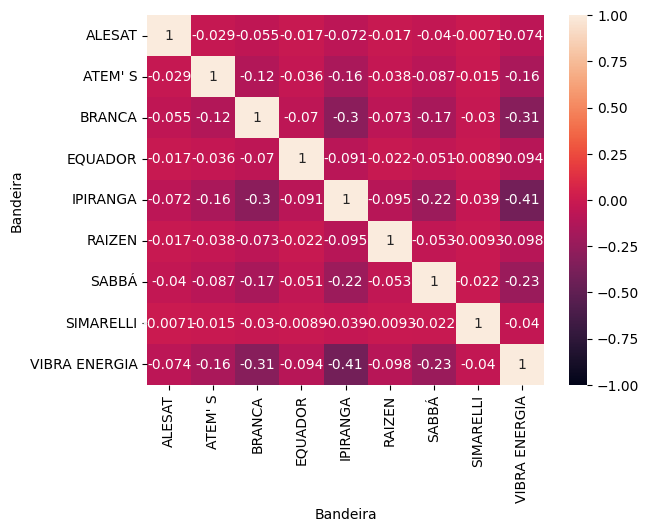

In [ ]:
band_gasolina_adtv_preco_N = dados.loc[(dados['Regiao'] == 'N') & (dados['Produto'] == 'GASOLINA ADITIVADA'), 'Preço de Venda'].values
band_gasolina_adtv_bandeira_N = dados.loc[(dados['Regiao'] == 'N') & (dados['Produto'] == 'GASOLINA ADITIVADA'), 'Bandeira'].values
gasolina_adtv_reg_N = pd.DataFrame({'Venda': band_gasolina_adtv_preco_N, 'Bandeira': band_gasolina_adtv_bandeira_N})
gasolina_adtv_reg_pivot = gasolina_adtv_reg_N.pivot_table(index=gasolina_adtv_reg_N.index, columns='Bandeira', values='Venda')
gasolina_adtv_reg_pivot = gasolina_adtv_reg_pivot.fillna(0).corr()
sns.heatmap(gasolina_adtv_reg_pivot,vmin=-1.0, vmax=1.0, annot=True)



### Região Nordeste

In [ ]:
band_gasolina_adtv_preco_NE = dados.loc[(dados['Regiao'] == 'NE') & (dados['Produto'] == 'GASOLINA ADITIVADA'), 'Preço de Venda'].values
band_gasolina_adtv_bandeira_NE = dados.loc[(dados['Regiao'] == 'NE') & (dados['Produto'] == 'GASOLINA ADITIVADA'), 'Bandeira'].values
gasolina_adtv_reg_NE = pd.DataFrame({'Venda': band_gasolina_adtv_preco_NE, 'Bandeira': band_gasolina_adtv_bandeira_NE})
gasolina_adtv_reg_pivot = gasolina_adtv_reg_NE.pivot_table(index=gasolina_adtv_reg_NE.index, columns='Bandeira', values='Venda')
gasolina_adtv_reg_pivot.fillna(0).corr()

Bandeira,AIR BP,ALESAT,BRANCA,DISLUB,FAN,FEDERAL ENERGIA,IPIRANGA,LARCO,PETROBAHIA,PETROX DISTRIBUIDORA,RAIZEN,SABBÁ,SP,TDC DISTRIBUIDORA,VIBRA ENERGIA
Bandeira,,,,,,,,,,,,,,,
AIR BP,1.000000,-0.007336,-0.022071,-0.003255,-0.001622,-0.000867,-0.012232,-0.001681,-0.001438,-0.002129,-0.011286,-0.004506,-0.003403,-0.002037,-0.020315
ALESAT,-0.007336,1.000000,-0.166978,-0.024622,-0.012272,-0.006562,-0.092539,-0.012718,-0.010877,-0.016105,-0.085386,-0.034089,-0.025744,-0.015413,-0.153695
BRANCA,-0.022071,-0.166978,1.000000,-0.074074,-0.036919,-0.019741,-0.278393,-0.038260,-0.032722,-0.048449,-0.256873,-0.102553,-0.077448,-0.046368,-0.462376
DISLUB,-0.003255,-0.024622,-0.074074,1.000000,-0.005444,-0.002911,-0.041051,-0.005642,-0.004825,-0.007144,-0.037878,-0.015122,-0.011420,-0.006837,-0.068181
FAN,-0.001622,-0.012272,-0.036919,-0.005444,1.000000,-0.001451,-0.020460,-0.002812,-0.002405,-0.003561,-0.018879,-0.007537,-0.005692,-0.003408,-0.033982
FEDERAL ENERGIA,-0.000867,-0.006562,-0.019741,-0.002911,-0.001451,1.000000,-0.010941,-0.001504,-0.001286,-0.001904,-0.010095,-0.004030,-0.003044,-0.001822,-0.018171
IPIRANGA,-0.012232,-0.092539,-0.278393,-0.041051,-0.020460,-0.010941,1.000000,-0.021203,-0.018134,-0.026850,-0.142358,-0.056834,-0.042922,-0.025697,-0.256247
LARCO,-0.001681,-0.012718,-0.038260,-0.005642,-0.002812,-0.001504,-0.021203,1.000000,-0.002492,-0.003690,-0.019564,-0.007811,-0.005899,-0.003532,-0.035216
PETROBAHIA,-0.001438,-0.010877,-0.032722,-0.004825,-0.002405,-0.001286,-0.018134,-0.002492,1.000000,-0.003156,-0.016733,-0.006680,-0.005045,-0.003020,-0.030119


### Região Sul

In [ ]:
band_gasolina_adtv_preco_S = dados.loc[(dados['Regiao'] == 'S') & (dados['Produto'] == 'GASOLINA ADITIVADA'), 'Preço de Venda'].values
band_gasolina_adtv_bandeira_S = dados.loc[(dados['Regiao'] == 'S') & (dados['Produto'] == 'GASOLINA ADITIVADA'), 'Bandeira'].values
gasolina_adtv_reg_S = pd.DataFrame({'Venda': band_gasolina_adtv_preco_S, 'Bandeira': band_gasolina_adtv_bandeira_S})
gasolina_adtv_reg_pivot = gasolina_adtv_reg_S.pivot_table(index=gasolina_adtv_reg_S.index, columns='Bandeira', values='Venda')
gasolina_adtv_reg_pivot.fillna(0).corr()

Bandeira,ALESAT,AMERICANOIL,BRANCA,CHARRUA,CIAPETRO,DIBRAPE,ESTRADA,IDAZA,IPIRANGA,MAXSUL,...,PELIKANO,POTENCIAL,RAIZEN,RAIZEN MIME,RODOIL,STANG,SUL COMBUSTÍVEIS,UNI,VIBRA ENERGIA,WALENDOWSKY
Bandeira,,,,,,,,,,,,,,,,,,,,,
ALESAT,1.000000,-0.001843,-0.082174,-0.015946,-0.008852,-0.004515,-0.003192,-0.010612,-0.096739,-0.012540,...,-0.005833,-0.011539,-0.053888,-0.022374,-0.018187,-0.018097,-0.004516,-0.005216,-0.065193,-0.002607
AMERICANOIL,-0.001843,1.000000,-0.007627,-0.001480,-0.000822,-0.000419,-0.000296,-0.000985,-0.008979,-0.001164,...,-0.000541,-0.001071,-0.005002,-0.002077,-0.001688,-0.001680,-0.000419,-0.000484,-0.006051,-0.000242
BRANCA,-0.082174,-0.007627,1.000000,-0.065989,-0.036631,-0.018684,-0.013211,-0.043914,-0.400330,-0.051893,...,-0.024137,-0.047750,-0.223000,-0.092590,-0.075262,-0.074890,-0.018689,-0.021584,-0.269783,-0.010787
CHARRUA,-0.015946,-0.001480,-0.065989,1.000000,-0.007108,-0.003626,-0.002564,-0.008522,-0.077686,-0.010070,...,-0.004684,-0.009266,-0.043274,-0.017967,-0.014605,-0.014533,-0.003627,-0.004189,-0.052352,-0.002093
CIAPETRO,-0.008852,-0.000822,-0.036631,-0.007108,1.000000,-0.002013,-0.001423,-0.004730,-0.043124,-0.005590,...,-0.002600,-0.005144,-0.024022,-0.009974,-0.008107,-0.008067,-0.002013,-0.002325,-0.029061,-0.001162
DIBRAPE,-0.004515,-0.000419,-0.018684,-0.003626,-0.002013,1.000000,-0.000726,-0.002413,-0.021996,-0.002851,...,-0.001326,-0.002624,-0.012253,-0.005087,-0.004135,-0.004115,-0.001027,-0.001186,-0.014823,-0.000593
ESTRADA,-0.003192,-0.000296,-0.013211,-0.002564,-0.001423,-0.000726,1.000000,-0.001706,-0.015552,-0.002016,...,-0.000938,-0.001855,-0.008663,-0.003597,-0.002924,-0.002909,-0.000726,-0.000839,-0.010481,-0.000419
IDAZA,-0.010612,-0.000985,-0.043914,-0.008522,-0.004730,-0.002413,-0.001706,1.000000,-0.051697,-0.006701,...,-0.003117,-0.006166,-0.028798,-0.011957,-0.009719,-0.009671,-0.002413,-0.002787,-0.034839,-0.001393
IPIRANGA,-0.096739,-0.008979,-0.400330,-0.077686,-0.043124,-0.021996,-0.015552,-0.051697,1.000000,-0.061091,...,-0.028415,-0.056214,-0.262527,-0.109001,-0.088602,-0.088165,-0.022002,-0.025410,-0.317601,-0.012699


### Região Sudeste

In [ ]:
band_gasolina_adtv_preco_SE = dados.loc[(dados['Regiao'] == 'SE') & (dados['Produto'] == 'GASOLINA ADITIVADA'), 'Preço de Venda'].values
band_gasolina_adtv_bandeira_SE = dados.loc[(dados['Regiao'] == 'SE') & (dados['Produto'] == 'GASOLINA ADITIVADA'), 'Bandeira'].values
gasolina_adtv_reg_SE = pd.DataFrame({'Venda': band_gasolina_adtv_preco_SE, 'Bandeira': band_gasolina_adtv_bandeira_SE})
gasolina_adtv_reg_pivot = gasolina_adtv_reg_SE.pivot_table(index=gasolina_adtv_reg_SE.index, columns='Bandeira', values='Venda')
gasolina_adtv_reg_pivot.fillna(0).corr()

Bandeira,ALESAT,ATLÂNTICA,BRANCA,CIAPETRO,D`MAIS,IPIRANGA,PETROBRASIL,RAIZEN,RIO BRANCO,TORRAO,TOTALENERGIES,VIBRA ENERGIA
Bandeira,,,,,,,,,,,,
ALESAT,1.000000,-0.011810,-0.117610,-0.001607,-0.006429,-0.109079,-0.003213,-0.092124,-0.006013,-0.001607,-0.010300,-0.098091
ATLÂNTICA,-0.011810,1.000000,-0.039972,-0.000546,-0.002185,-0.037073,-0.001092,-0.031310,-0.002044,-0.000546,-0.003501,-0.033339
BRANCA,-0.117610,-0.039972,1.000000,-0.005438,-0.021760,-0.369193,-0.010876,-0.311806,-0.020353,-0.005438,-0.034860,-0.332005
CIAPETRO,-0.001607,-0.000546,-0.005438,1.000000,-0.000297,-0.005043,-0.000149,-0.004259,-0.000278,-0.000074,-0.000476,-0.004535
D`MAIS,-0.006429,-0.002185,-0.021760,-0.000297,1.000000,-0.020181,-0.000595,-0.017044,-0.001113,-0.000297,-0.001906,-0.018149
IPIRANGA,-0.109079,-0.037073,-0.369193,-0.005043,-0.020181,1.000000,-0.010087,-0.289189,-0.018876,-0.005043,-0.032332,-0.307922
PETROBRASIL,-0.003213,-0.001092,-0.010876,-0.000149,-0.000595,-0.010087,1.000000,-0.008519,-0.000556,-0.000149,-0.000952,-0.009071
RAIZEN,-0.092124,-0.031310,-0.311806,-0.004259,-0.017044,-0.289189,-0.008519,1.000000,-0.015942,-0.004259,-0.027306,-0.260059
RIO BRANCO,-0.006013,-0.002044,-0.020353,-0.000278,-0.001113,-0.018876,-0.000556,-0.015942,1.000000,-0.000278,-0.001782,-0.016975


### Região Centro Oeste

In [ ]:
band_gasolina_adtv_preco_CO = dados.loc[(dados['Regiao'] == 'CO') & (dados['Produto'] == 'GASOLINA ADITIVADA'), 'Preço de Venda'].values
band_gasolina_adtv_bandeira_CO = dados.loc[(dados['Regiao'] == 'CO') & (dados['Produto'] == 'GASOLINA ADITIVADA'), 'Bandeira'].values
gasolina_adtv_reg_CO = pd.DataFrame({'Venda': band_gasolina_adtv_preco_CO, 'Bandeira': band_gasolina_adtv_bandeira_CO})
gasolina_adtv_reg_pivot = gasolina_adtv_reg_CO.pivot_table(index=gasolina_adtv_reg_CO.index, columns='Bandeira', values='Venda')
gasolina_adtv_reg_pivot.fillna(0).corr()

Bandeira,ALESAT,ATEM' S,BRANCA,CIAPETRO,IPIRANGA,MASUT DISTRIBUIDORA,RAIZEN,ROYAL FIC,SIMARELLI,TAURUS,VIBRA ENERGIA
Bandeira,,,,,,,,,,,
ALESAT,1.000000,-0.001999,-0.042282,-0.003747,-0.034470,-0.006027,-0.023562,-0.002830,-0.001997,-0.007372,-0.031849
ATEM' S,-0.001999,1.000000,-0.024366,-0.002159,-0.019865,-0.003473,-0.013578,-0.001631,-0.001151,-0.004248,-0.018354
BRANCA,-0.042282,-0.024366,1.000000,-0.045681,-0.420253,-0.073474,-0.287261,-0.034499,-0.024343,-0.089876,-0.388292
CIAPETRO,-0.003747,-0.002159,-0.045681,1.000000,-0.037241,-0.006511,-0.025456,-0.003057,-0.002157,-0.007964,-0.034409
IPIRANGA,-0.034470,-0.019865,-0.420253,-0.037241,1.000000,-0.059900,-0.234189,-0.028125,-0.019846,-0.073272,-0.316554
MASUT DISTRIBUIDORA,-0.006027,-0.003473,-0.073474,-0.006511,-0.059900,1.000000,-0.040944,-0.004917,-0.003470,-0.012810,-0.055344
RAIZEN,-0.023562,-0.013578,-0.287261,-0.025456,-0.234189,-0.040944,1.000000,-0.019225,-0.013565,-0.050084,-0.216378
ROYAL FIC,-0.002830,-0.001631,-0.034499,-0.003057,-0.028125,-0.004917,-0.019225,1.000000,-0.001629,-0.006015,-0.025986
SIMARELLI,-0.001997,-0.001151,-0.024343,-0.002157,-0.019846,-0.003470,-0.013565,-0.001629,1.000000,-0.004244,-0.018336


#11 - Em quais postos foi mais vantajoso abastecer com o Etanol ao invés da gasolina?

In [ ]:
# Filtrar os dados para considerar apenas registros com valores válidos na coluna "Preço de Venda" e "Produto"
dados_validos = dados.dropna(subset=['Preço de Venda', 'Produto'])

# Filtrar apenas os registros de gasolina e etanol
dados_gasolina_etanol = dados_validos[dados_validos['Produto'].isin(['GASOLINA', 'ETANOL'])]

# Criar uma lista vazia para armazenar os resultados
resultados = []

# Verificar se há revendas em que o etanol equivale a até 70% do preço da gasolina
for cnpj in dados_gasolina_etanol['CNPJ da Revenda'].unique():
    dados_revenda = dados_gasolina_etanol[dados_gasolina_etanol['CNPJ da Revenda'] == cnpj]
    gasolina_data = dados_revenda[dados_revenda['Produto'] == 'GASOLINA']
    if not gasolina_data.empty:
        gasolina = gasolina_data['Preço de Venda'].iloc[0]
        etanol_data = dados_revenda[dados_revenda['Produto'] == 'ETANOL']
        if not etanol_data.empty:
            etanol = etanol_data['Preço de Venda'].iloc[0]
            nome_revenda = dados_revenda['Revenda'].iloc[0]  # Obtém o nome da revenda
            estado_revenda = dados_revenda['Estado'].iloc[0]  # Obtém o estado da revenda
            razao_etanol_gasolina = etanol / gasolina
            if razao_etanol_gasolina <= 0.7:
                resultados.append({'CNPJ da Revenda': cnpj, 'Nome da Revenda': nome_revenda, 'Estado': estado_revenda, 'Valor Etanol': round(etanol, 2), 'Valor Gasolina': round(gasolina, 2)})

# Criar um DataFrame com os resultados
resultado_df = pd.DataFrame(resultados)

# Classificar os resultados pelo melhor preço de etanol em relação à gasolina
resultado_df = resultado_df.sort_values(by='Valor Etanol', ascending=True)
resultado_df


,CNPJ da Revenda,Nome da Revenda,Estado,Valor Etanol,Valor Gasolina
34,05.336.324/0001-19,POSTO MARIO ANDREAZA COMERCIO DE COMBUSTIVEIS ...,MT,3.13,4.79
33,05.928.523/0001-16,PAPITO AUTO POSTO VARZEA GRANDE LTDA,MT,3.13,4.79
762,49.889.405/0001-11,AUTO POSTO BRASIL LINS COMERCIO DE COMBUSTIVEI...,SP,3.14,4.79
6,05.696.453/0001-18,EL ELION COMERCIO DE COMBUSTIVEIS LTDA,MT,3.17,4.99
32,07.728.011/0001-31,ALIANCA COMERCIO DE COMBUSTIVEL LTDA,MT,3.19,4.97
...,...,...,...,...,...
239,02.297.445/0001-00,AUTO POSTO MARANELO II LTDA,SP,4.79,6.99
409,04.718.285/0001-51,BETHA SERVICOS AUTOMOTIVOS LTDA.,SP,4.89,6.99
120,07.830.357/0001-46,AUTO POSTO DUQUE BARUERI LTDA.,SP,4.89,6.99
247,02.117.250/0001-31,SKY AUTO POSTO LTDA,SP,4.99,7.19


# 12 - Qual é a média de preço de venda do etanol para cada bandeira de postos de combustível?

In [ ]:
# Filtrar apenas os dados referentes ao etanol
etanol = dados[dados['Produto'] == 'ETANOL']

# Calcular a média dos preços de venda agrupados por bandeira
media_bandeira_etanol = etanol.groupby(['Bandeira', 'Estado'])['Preço de Venda'].mean().reset_index()
media_bandeira_etanol.sort_values(by='Preço de Venda', ascending=True)

# Definir a largura da figura
#largura = 12
#altura = 6

# Criar uma figura com largura ajustável
#fig, ax = plt.subplots(figsize=(largura, altura))


# Plotar o gráfico de barras
#media_bandeira_etanol.plot(kind='bar', color='blue', ax=ax)
#plt.xlabel('Bandeira')
#plt.ylabel('Preço Médio de Venda')
#plt.title('Média de Preço de Venda do Etanol por Bandeira')
#plt.xticks(rotation=90)
#plt.show()

,Bandeira,Estado,Preço de Venda
153,TORRAO,SP,3.570000
37,BRANCA,MT,3.607217
104,PETROBRASIL,SP,3.617500
118,RAIZEN,MT,3.631500
135,ROYAL FIC,MS,3.670000
...,...,...,...
93,IPIRANGA,RS,5.133100
75,IPIRANGA,AP,5.326667
20,ATEM' S,AC,5.350000
133,RODOIL,RS,5.368421
